In [161]:
%load_ext autoreload
%autoreload 2

%pylab inline

import dataloaders
import models
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics 
import sklearn.cluster as cluster
import numpy as np 
import random
import classifiers
from torch.autograd import Variable
import torch
import torch.nn as nn 
import torch.optim as optim
import util

from imblearn.under_sampling import RandomUnderSampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


/Users/inzamamrahaman/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'colors', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [226]:
output_file_vot = '../data/pollblogs/pollblogs-cleaned.csv'
output_file_nam = '../data/pollblogs/pollblogs-class.csv'
data = dataloaders.SenateDataset(output_file_vot, output_file_nam, ratio=0.8, delimiter=',')

In [251]:
num_nodes = data.get_num_nodes()
dims = 16
epochs = 200
lr = 0.10
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
X_train, y_train = data.get_training_set()
X_test, y_test = data.get_testing_set()
p = 2
X = data.X
y = data.y

model_fitter = models.fit_pseudo_kernel_model

In [252]:
len(y)

19090

In [253]:
kernel_model = model_fitter(num_nodes, dims, X_train, y_train, epochs=epochs, p=p, 
                                              lr=lr,lr_decay=lr_decay, lam=lam, 
                            weight_decay=weight_decay, undersample=False)

The loss at epoch  1  was  0.6938682198524475
The loss at epoch  2  was  0.6486061811447144
The loss at epoch  3  was  0.48617273569107056
The loss at epoch  4  was  0.40501222014427185
The loss at epoch  5  was  0.40336906909942627
The loss at epoch  6  was  0.4017738103866577
The loss at epoch  7  was  0.40096136927604675
The loss at epoch  8  was  0.400485634803772
The loss at epoch  9  was  0.40003639459609985
The loss at epoch  10  was  0.39974740147590637
The loss at epoch  11  was  0.39941173791885376
The loss at epoch  12  was  0.3990831971168518
The loss at epoch  13  was  0.3987537920475006
The loss at epoch  14  was  0.39848533272743225
The loss at epoch  15  was  0.39821475744247437
The loss at epoch  16  was  0.39800649881362915
The loss at epoch  17  was  0.39775344729423523
The loss at epoch  18  was  0.39758971333503723
The loss at epoch  19  was  0.39734891057014465
The loss at epoch  20  was  0.39718642830848694
The loss at epoch  21  was  0.396950900554657
The loss a

The loss at epoch  176  was  0.3845367729663849
The loss at epoch  177  was  0.3845938742160797
The loss at epoch  178  was  0.38453832268714905
The loss at epoch  179  was  0.38493236899375916
The loss at epoch  180  was  0.38445547223091125
The loss at epoch  181  was  0.38465091586112976
The loss at epoch  182  was  0.3845064640045166
The loss at epoch  183  was  0.3851618766784668
The loss at epoch  184  was  0.38445332646369934
The loss at epoch  185  was  0.384575754404068
The loss at epoch  186  was  0.3843385577201843
The loss at epoch  187  was  0.3847384750843048
The loss at epoch  188  was  0.3844330310821533
The loss at epoch  189  was  0.384947806596756
The loss at epoch  190  was  0.3842807412147522
The loss at epoch  191  was  0.3845882713794708
The loss at epoch  192  was  0.38441598415374756
The loss at epoch  193  was  0.38552388548851013
The loss at epoch  194  was  0.38466358184814453
The loss at epoch  195  was  0.3848012685775757
The loss at epoch  196  was  0.384

In [254]:
from sklearn.manifold import TSNE, MDS

In [255]:
tsne = TSNE(n_components=2)
mds = MDS(n_components=2)

In [256]:
import sklearn.cluster as cluster

In [257]:
clf = cluster.KMeans(n_clusters=2)

In [258]:
all_embeddings = kernel_model.get_all_weights()

In [259]:
viable_embeddings = all_embeddings[1:,:]

In [260]:
reduced = tsne.fit_transform(viable_embeddings)

In [261]:
colors = ['blue' if x == 0 else 'red' for x in data.get_node_classes()]
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
rcParams['axes.titlesize'] = 14

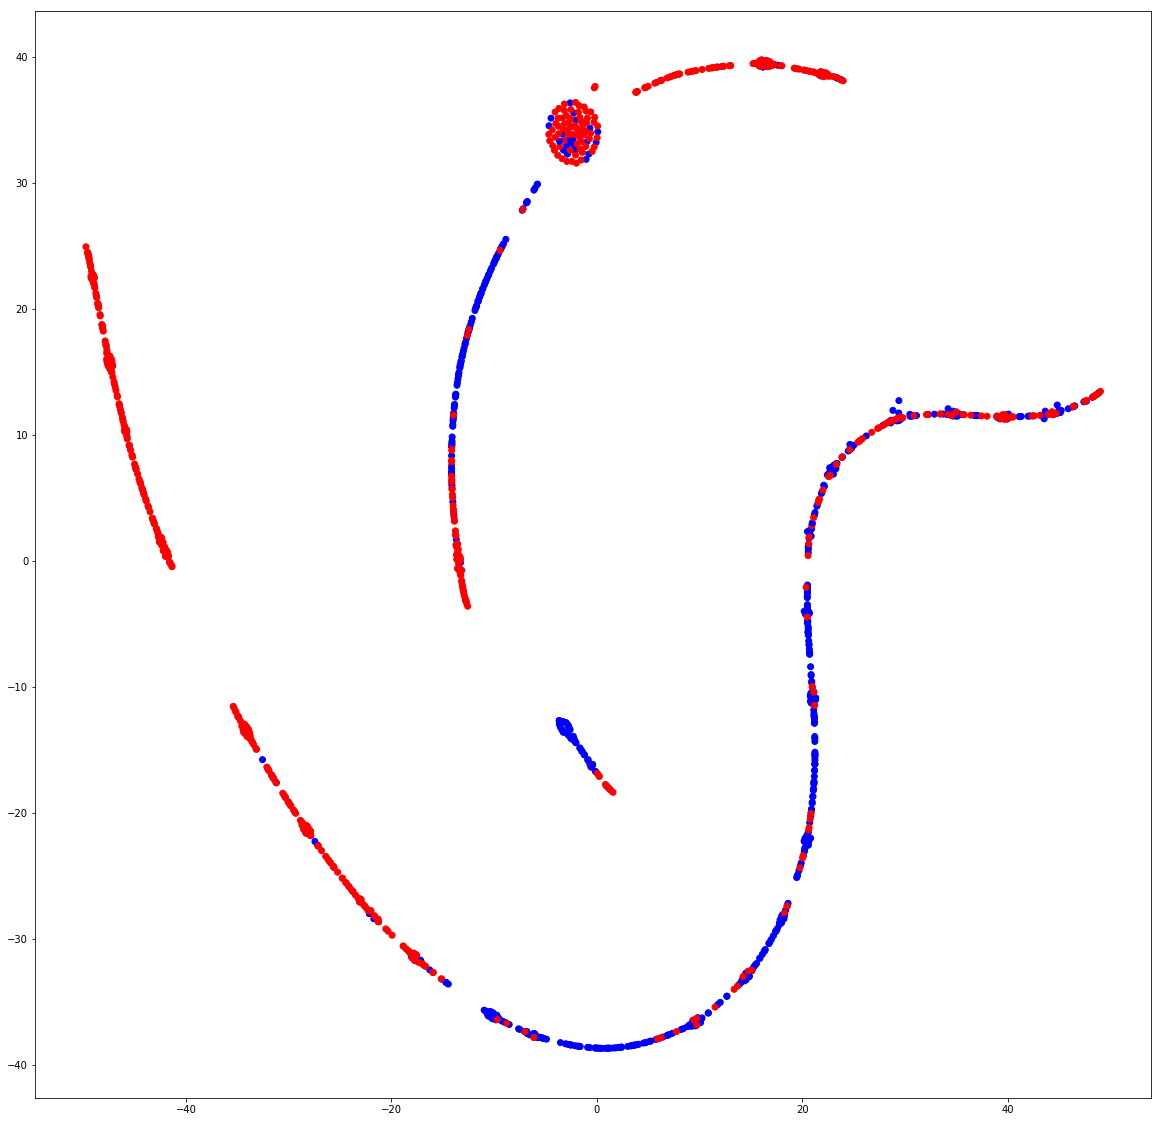

In [262]:
plt.scatter(reduced[:,0], reduced[:,1],c=colors)

In [263]:
labels = clf.fit_predict(viable_embeddings)

In [264]:
labels

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [265]:
correct_labels = data.get_node_classes()

In [266]:
len(correct_labels)

1224

In [267]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [268]:
normalized_mutual_info_score(correct_labels, labels)

0.23731442215722298

In [269]:
num_nodes = data.get_num_nodes()
dims = 32
epochs = 100
lr = 0.1
lr_decay=0.0
weight_decay=0.0
lam = 0.00055
p = 2
delta = 1
delta0 = 0.5
dims_array = [dims, 20, 20]

In [270]:
model_fitter = models.fit_sine_model
triples, triples0 = util.triples_from_array(X, y)
batch_size = int(1.0 * len(triples))
batch_size0 = int(1.0 * len(triples0))

In [247]:
sine_model = model_fitter(num_nodes, dims_array, triples, triples0, delta, delta0,
                                   batch_size, batch_size0, epochs, lr=lr, lr_decay=lr_decay,
                                  lam=lam, p=p, p0=True)

Loss at epoch  1  is  0.9802922606468201
Loss at epoch  2  is  0.840734601020813
Loss at epoch  3  is  0.41397640109062195
Loss at epoch  4  is  0.8895852565765381
Loss at epoch  5  is  0.6886106133460999
Loss at epoch  6  is  0.4021938443183899
Loss at epoch  7  is  0.40453556180000305
Loss at epoch  8  is  0.3906833231449127
Loss at epoch  9  is  0.3552408218383789
Loss at epoch  10  is  0.33920910954475403
Loss at epoch  11  is  0.3199699819087982
Loss at epoch  12  is  0.33626487851142883
Loss at epoch  13  is  0.3375679552555084
Loss at epoch  14  is  0.3230205774307251
Loss at epoch  15  is  0.2376825213432312
Loss at epoch  16  is  0.224774569272995
Loss at epoch  17  is  0.218300923705101
Loss at epoch  18  is  0.215392604470253
Loss at epoch  19  is  0.21197929978370667
Loss at epoch  20  is  0.2099146693944931
Loss at epoch  21  is  0.20846572518348694
Loss at epoch  22  is  0.20780523121356964
Loss at epoch  23  is  0.20661889016628265
Loss at epoch  24  is  0.20576915144920

In [248]:
clf2 = cluster.KMeans(n_clusters=2)
all_embeddings2 = sine_model.get_all_weights()
viable_embeddings2 = all_embeddings2[1:,:]
labels2 = clf2.fit_predict(viable_embeddings2)

In [249]:
normalized_mutual_info_score(correct_labels, labels2)

0.35155663866382741